# R^2

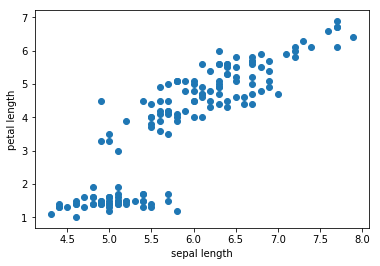

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

X_original = iris.data

X = X_original[:,0]  # 꽃받침 길이
y = X_original[:,2]  # 꽃잎 길이


plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.scatter(X,y)

##### train datasets과 test datasets으로 나누기

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(0.3))

##### 선형모델

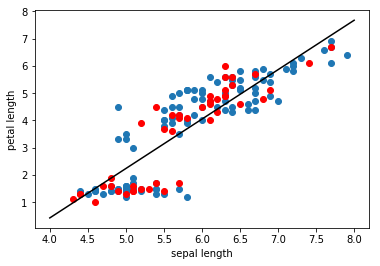

In [45]:
from sklearn.linear_model import LinearRegression
lig = LinearRegression()                # 모델 생성
lig.fit(X_train.reshape(-1,1),y_train)  # 모델 학습

w = lig.coef_  
b = lig.intercept_

xx = np.linspace(4,8,10)
yy = w * xx + b

plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.plot(xx, yy,c ='k')
plt.scatter(X_train,y_train)

plt.scatter(X_test,y_test, c='r')

### R^2 TEST

In [47]:
R2 = lig.score(X_test.reshape(-1,1), y_test)
print(R2)

0.7887807509373899


## performance evaluation for classification

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

X_original = iris.data

X = X_original[:,[0,1]] 
y = iris.target
y2 = y.copy()
y2[y2==2]=1

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y2,test_size=(0.3), random_state = 7)

In [113]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train,y_train)
clf.coef_, clf.intercept_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


(array([[ 38.71391076, -67.58530184]]), array([-9.5506613]))

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9333333333333333

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.97      0.94      0.95        33

   micro avg       0.93      0.93      0.93        45
   macro avg       0.91      0.93      0.92        45
weighted avg       0.94      0.93      0.93        45

[[11  1]
 [ 2 31]]


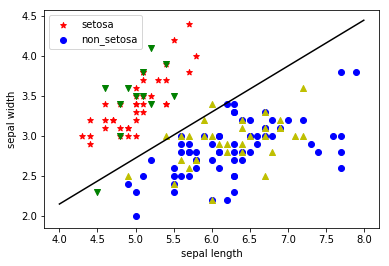

In [115]:
#학습
my_marker = ['*','o']
my_colors = ['r','b']

for i in range(2):
    xs = X_train[:,0][y_train==i]
    ys = X_train[:,1][y_train==i]
    plt.scatter(xs, ys, marker = my_marker[i], c = my_colors[i])

#시험
my_marker = ['v','^']
my_colors = ['g','y']
for i in range(2):
    xs = X_test[:,0][y_test==i]
    ys = X_test[:,1][y_test==i]
    plt.scatter(xs, ys, marker = my_marker[i], c = my_colors[i])

    
names=['setosa','non_setosa']
plt.legend(names)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]
b = clf.intercept_[0]

xx = np.linspace(4,8,100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx,yy,c='k')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))